In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score
from  sklearn.metrics import mean_squared_error as MSE
import sklearn.cross_validation as CV
from sklearn.metrics.scorer import make_scorer
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,RandomForestRegressor

# Primera Parte

## GRAFICA 8.8 (Heart Disease)

In [26]:
DATA=pd.read_csv("processed.cleveland.csv")
Y=np.array(DATA["num"])
features=[]
excluidas=["num"]
for x in DATA:
    if(np.logical_not(x in excluidas)):
        features.append(x)
X=np.array(DATA[features])
ii=Y>0
Y[ii]=1



In [77]:
max_trees=160

forest_size=[]
e_TestBagging=[]
e_TestForest=[]
e_OOBForest=[]
e_OOBBagging=[]

m_feat=0.5#int(len(features)/2)

clf_st=DecisionTreeClassifier()
m_sp=int(np.sqrt(len(Y)))


for n_trees in range(1,max_trees):
    if(n_trees%10==0):
        print(n_trees)
    x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.5)

    rfc=RandomForestRegressor(n_estimators=n_trees,max_features=m_feat,oob_score=True)#,max_features=m_feat)
    bgf=BaggingClassifier(base_estimator=clf_st, n_estimators=n_trees,oob_score=True)
    rfc.fit(x_train,y_train)
    bgf.fit(x_train,y_train)
    
    rfc_predict_train=rfc.predict(x_train)
    rfc_predict_test=rfc.predict(x_test)
    
    bgf_predict_train=bgf.predict(x_train)
    bgf_predict_test=bgf.predict(x_test)
    
    forest_size.append(n_trees)
    
    #e_TBagg=np.sum(np.ones(len(y_test))[y_test!=bgf_predict_test])/len(y_test)
    #e_TRForest=np.sum(np.ones(len(y_test))[y_test!=rfc_predict_test])/len(y_test)
    e_TBagg=MSE(y_test,bgf_predict_test)
    e_TRForest=MSE(y_test,rfc_predict_test)
    
    e_TestBagging.append(e_TBagg)
    e_TestForest.append(e_TRForest)
    
    err_OOBForest=(1-rfc.oob_score_)*np.sum((y_test-np.mean(y_test))**2)/len(y_test)
    err_OOBBagging=(1-bgf.oob_score_)*np.sum((y_test-np.mean(y_test))**2)/len(y_test)
    
    
   # e_OOBBagg=np.sum(np.ones(len(y_test))[y_test!=bgf_predict_test])/len(y_test)
   # e_OOBRForest=np.sum(np.ones(len(y_test))[y_test!=rfc_predict_test])/len(y_test)
    
    
    e_OOBForest.append((err_OOBForest))
    e_OOBBagging.append((err_OOBBagging))
    

/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/david/anaconda3/lib/python

10


/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


20
30
40
50
60
70
80
90
100
110
120
130
140
150


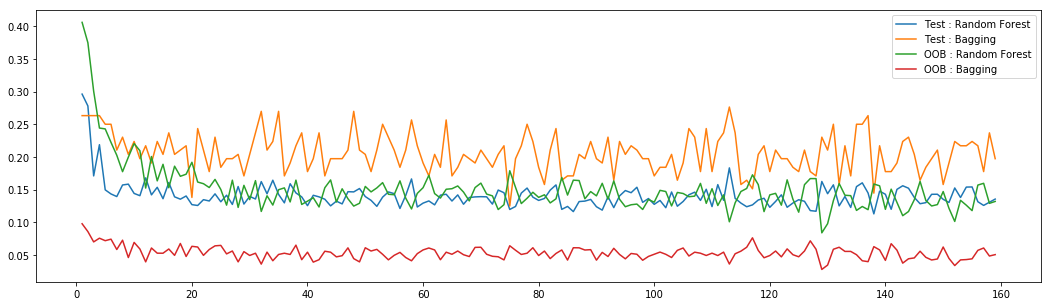

In [78]:
plt.figure(figsize=[18,5])
plt.plot(forest_size,e_TestForest,label="Test : Random Forest")
plt.plot(forest_size,e_TestBagging,label="Test : Bagging")
plt.plot(forest_size,e_OOBForest,label="OOB : Random Forest")
plt.plot(forest_size,e_OOBBagging,label="OOB : Bagging")
plt.legend()

In [70]:
np.shape(forest_size)

(57,)

## Figura 8.10 (Orange Juice)

In [50]:
DATA2=pd.read_csv("OJ.csv")

Y2=np.array(DATA2["Purchase"])
Y2[Y2 == 'CH'] = 1
Y2[Y2 == 'MM'] = 0
Y2=Y2.astype('int')


exc=["Purchase","Store7",]
feat=[]
for x in DATA2:
    if(np.logical_not(x in exc)):
        feat.append(x)
X2=np.array(DATA2[feat])[:,1:]

x_train2, x_test2, y_train2, y_test2 = sklearn.model_selection.train_test_split(X2,Y2, test_size=0.5)



In [60]:
maxtrees=500
phony=2

n_trees=[]
e_none=[]
e_sqrt=[]
e_half=[]

RF1=RandomForestRegressor(n_estimators=phony, warm_start=True, oob_score=True,max_features=None,bootstrap=True, min_samples_leaf=1)
RF2=RandomForestRegressor(n_estimators=phony, warm_start=True, oob_score=True,max_features=0.5,bootstrap=True, min_samples_leaf=1)
RF3=RandomForestRegressor(n_estimators=phony, warm_start=True, oob_score=True,max_features="sqrt",bootstrap=True, min_samples_leaf=1)


RForests=[[RF1,e_none],[RF2,e_half],[RF3,e_sqrt]]

for n_est in range(2,maxtrees):
    n_trees.append(n_est)
    for RF in RForests:
        RF[0].set_params(n_estimators=n_est)
        RF[0].fit(x_train2,y_train2)
        RF[1].append(MSE(y_test2,RF[0].predict(x_train2)))


/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/david/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn

Text(0,0.5,'Test Classification Error')

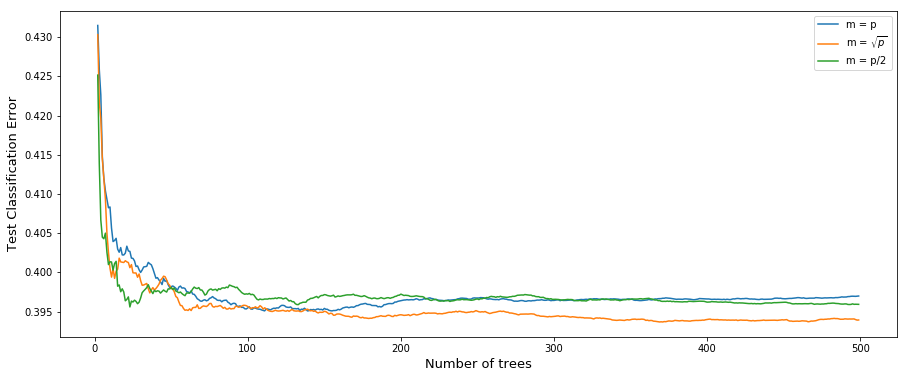

In [63]:
plt.figure(figsize=[15,6])
plt.plot(n_trees,e_none,label="m = p")
plt.plot(n_trees,e_sqrt,label="m = $\sqrt{p}$")
plt.plot(n_trees,e_half,label="m = p/2")
plt.legend()
plt.xlabel("Number of trees",fontsize=13)
plt.ylabel("Test Classification Error",fontsize=13)

# Segunda Parte

In [102]:
logreg=LogisticRegression()
lda=LinearDiscriminantAnalysis()
cltree=sklearn.tree.DecisionTreeRegressor()
clrf=RandomForestClassifier(max_features="sqrt")

e_logreg,e_lda,e_cltree,e_clrf=[],[],[],[]

analisis=[[logreg,e_logreg],[lda,e_lda],[cltree,e_cltree],[clrf,e_clrf]]

for model in analisis:
    model[0].fit(x_train2,y_train2)
    pred=model[0].predict(x_test2)
    
    #CM=confusion_matrix(np.array(y_test2),np.array(pred))
    
    true_p=np.sum(np.ones(len(y_test2))[np.logical_and(y_test2==1,pred==1)])
    false_p=np.sum(np.ones(len(y_test2))[np.logical_and(y_test2==0,pred==1)])
    true_n=np.sum(np.ones(len(y_test2))[np.logical_and(y_test2==0,pred==0)])
    false_n=np.sum(np.ones(len(y_test2))[np.logical_and(y_test2==1,pred==0)])
    
    rec=true_p/(true_p+false_p)
    pre=true_p/(true_p+false_n)
    
    model[1].append([pre,rec])
    
    
    #recall=CM[0,0]/(CM[0,0]+CM[1,0])#RECALL
    #prec=CM[0,0]/(CM[0,0]+CM[0,1])#PREC
    
    #model[1].append([prec,recall])





/home/david/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


IndexError: list index out of range

In [86]:
model[0].fit()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
np.shape(pred)

(535,)

In [105]:
analisis[0][1]

[[0.9090909090909091, 0.813953488372093]]